## Problem Statment
### Forest Fire Prediction using SVM

In [84]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

from sklearn.model_selection import KFold , GridSearchCV, train_test_split
from sklearn.svm import SVC

In [35]:
df=pd.read_csv('forestfires.csv')

In [36]:
df.drop(columns=['dayfri','daymon','daytue','daywed','daythu','daysat','daysun','monthjan','monthfeb','monthmar','monthapr','monthmay','monthjun','monthjan','monthjul','monthaug','monthsep','monthoct','monthnov','monthdec'],inplace=True)
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## Data Exploration

In [7]:
df.shape

(517, 12)

In [8]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [11]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [18]:
df[df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


In [19]:
df.drop_duplicates(inplace=True)
df.reset_index()

,index,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


##  Data Visualization

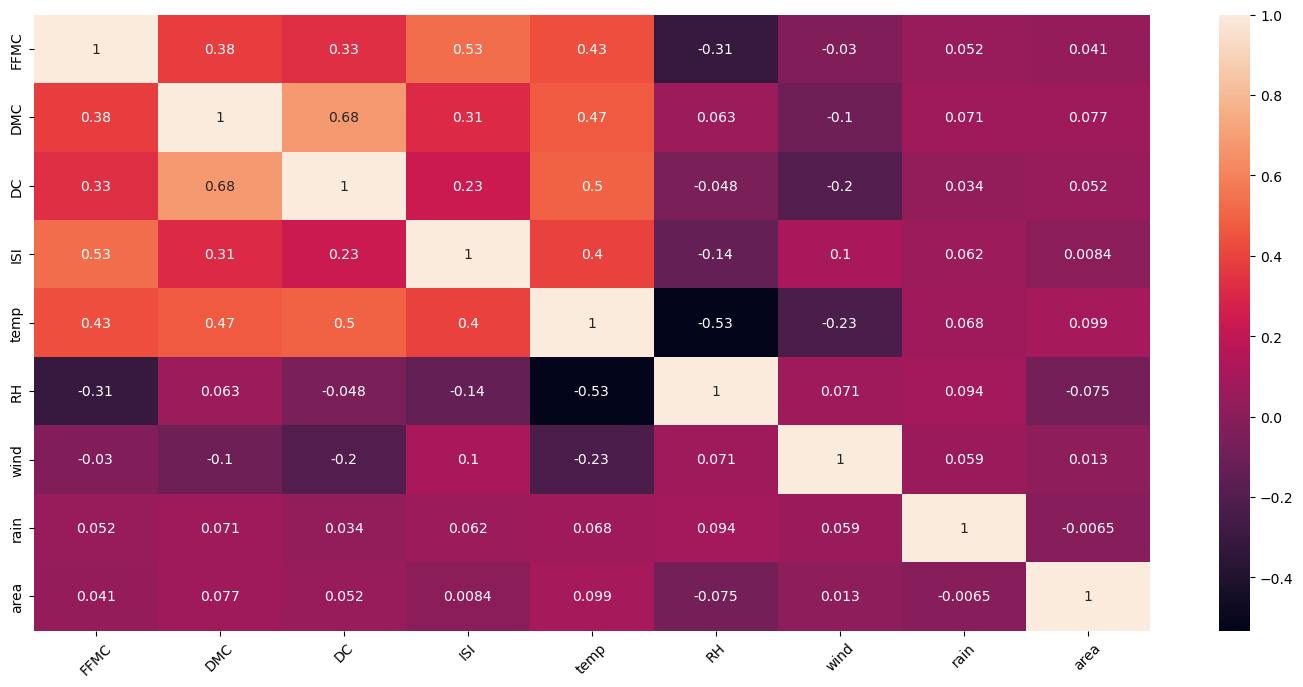

In [20]:
#Heatmap correlation.

fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

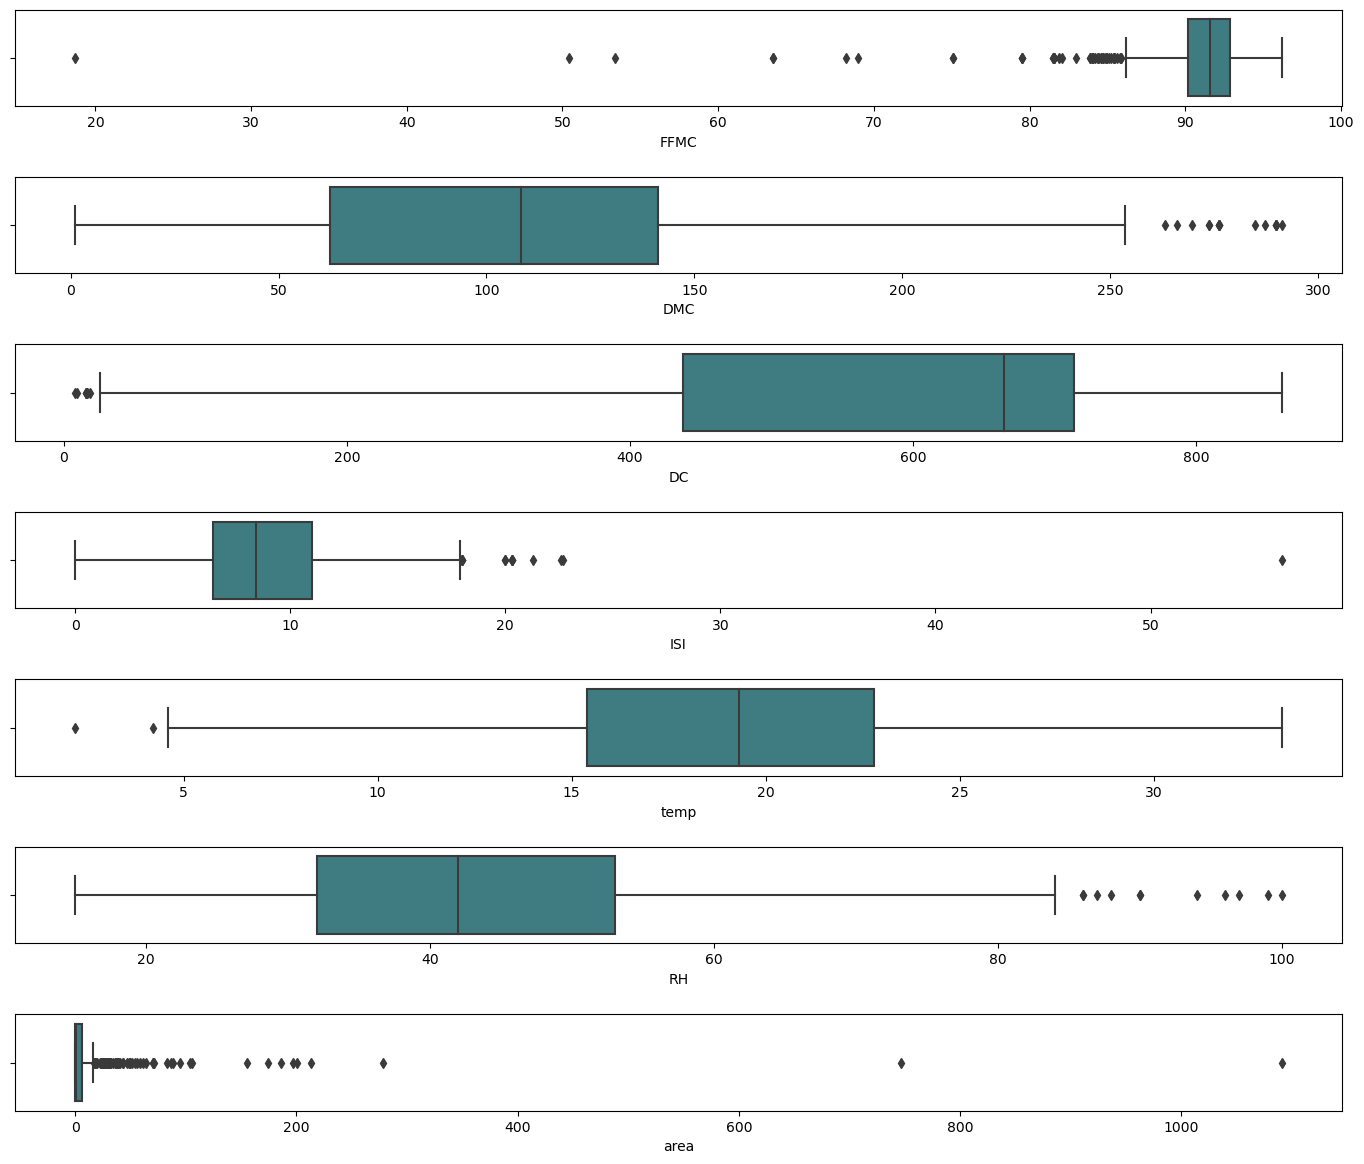

In [21]:
# Outlier Detection

ot=df.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

### There are a lot of outliers, we cannot remove them/ replace them, they may represent more info on data so lets keep them and proceed.

### Visualization on Area Column

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


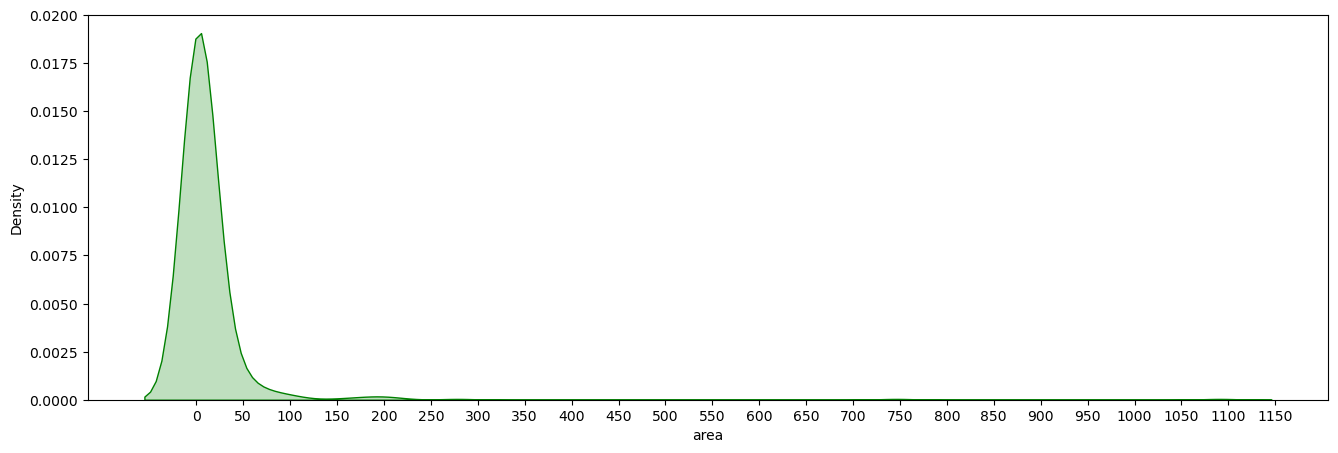

In [22]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### Inference:
+ The data is highly skewed with a value of +12.75 and huge kurtosis value of 191.26.

+ It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

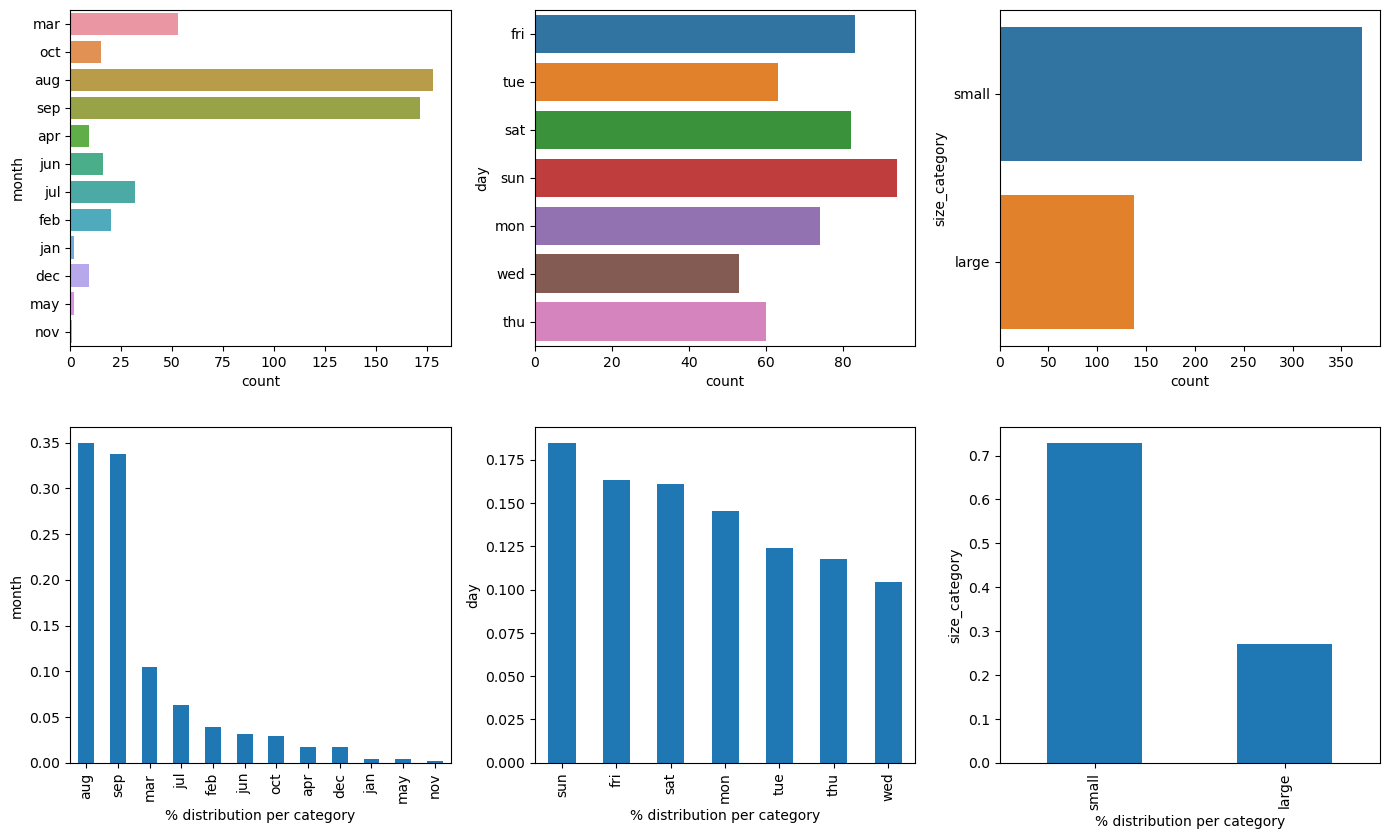

In [24]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

# analyzing categorical columns

plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

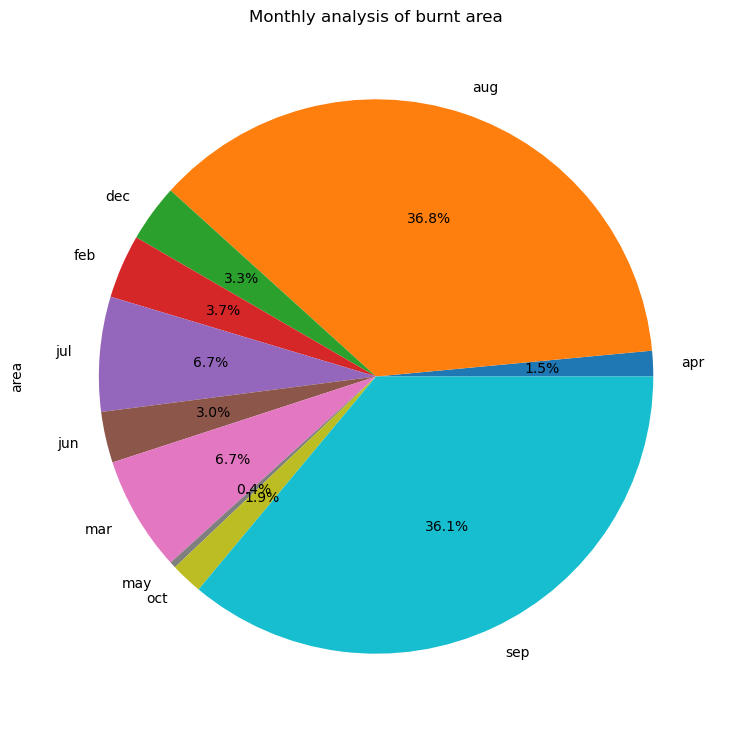

In [25]:
# monthly analysis of burnt area, where the condition is: area>0

areaburnt=df[df['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),autopct='%0.1f%%')
plt.show()

### Interesting to see that the about 70% of the forest fires occur in the month of august and september.

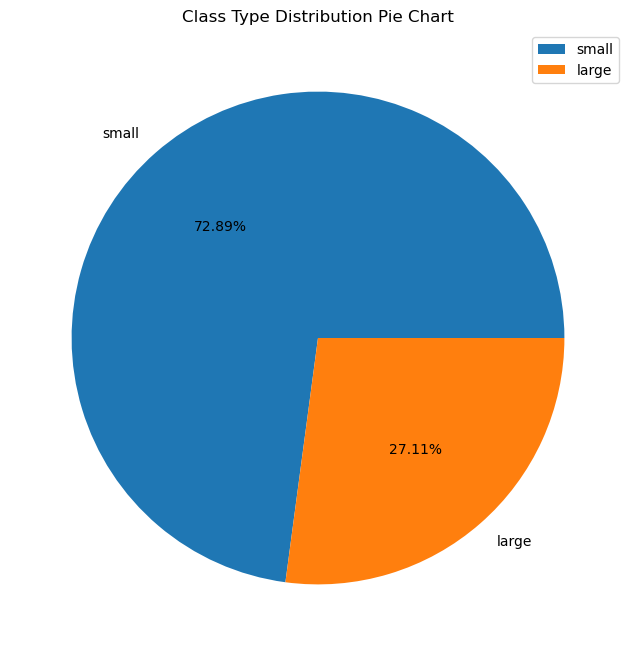

In [26]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       autopct= '%.2f%%')
plt.legend(loc= 'best')
plt.title("Class Type Distribution Pie Chart")
plt.show()

#### We can infer that its an imbalanced data, that is the Target variable has imbalanced types.

## Data Preprocessing

In [38]:
# One Hot encoding the Categorical Input variables.

df = pd.get_dummies(df)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0


In [37]:
# Label Encoding the target variable.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['size_category'] = le.fit_transform(df['size_category'])


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
297,jun,sun,90.4,89.5,290.8,6.4,15.4,45,2.2,0.0,0.0,1
101,aug,tue,88.8,147.3,614.5,9.0,14.4,66,5.4,0.0,0.0,1
445,aug,sun,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,0.0,1


In [81]:
df.sample(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
185,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,0,...,0,0,1,0,0,0,0,0,1,0
285,93.9,169.7,411.8,12.3,23.4,40,6.3,0.0,0.00,1,...,0,0,0,0,0,0,1,0,0,0
94,91.1,103.2,638.8,5.8,23.4,22,2.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

# Splitting X and y

X= df.drop(columns=['size_category'])
y= df['size_category']

In [40]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int32

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## SVC Model building
#### Building the model with default hyperparameters.

In [64]:
classifier = SVC()

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.73076923 0.76923077 0.73786408 0.75728155 0.73786408]
Mean CV score: 0.7466019417475729


### The model is giving 74% accuracy after cross validation, the Accuracy can be increased by tuning the hyper parameters.

In [56]:
classifier = SVC(kernel='poly',degree=25)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score,r2_score

print(accuracy_score(y_test,y_pred))


0.8557692307692307


In [58]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.84615385 0.91346154 0.84466019 0.91262136 0.85436893]
Mean CV score: 0.8742531740104555


In [59]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(classifier.score(X_train, y_train)*100))

print('Test set score: {:.2f}%'.format(classifier.score(X_test, y_test)*100))

Training set score: 89.83%
Test set score: 85.58%


### Creating a dict to hold the different combinations of hyperparameters.

In [68]:
model_params = {
        'kernel':['linear'],
        'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'kernel':['poly'], 'degree': [2,3,4,25] ,'gamma':[0.01,0.02,0.03,0.04,0.05] 
                }

In [69]:
grid_search = GridSearchCV(classifier, model_params, cv=5, scoring='accuracy')

In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'degree': [2, 3, 4, 25],
                         'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'kernel': ['poly']},
             scoring='accuracy')

In [71]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}


In [72]:
# Get the best model
best_model = grid_search.best_estimator_

In [74]:
# Evaluate the best model on the test set
accuracy1 = best_model.score(X_test, y_test)
accuracy2 = best_model.score(X_train, y_train)

print("Train Accuracy with Best Model:", accuracy2)
print("Test Accuracy with Best Model:", accuracy1)

Train Accuracy with Best Model: 1.0
Test Accuracy with Best Model: 0.9615384615384616


## Building the SVC Model with best params

In [77]:
classifier_final = SVC(kernel='poly',degree=3,gamma=0.01)

classifier_final.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier_final, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.97115385 0.99038462 0.9223301  0.95145631 0.96116505]
Mean CV score: 0.9592979835698283


In [79]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(classifier_final.score(X_train, y_train)*100))

print('Test set score: {:.2f}%'.format(classifier_final.score(X_test, y_test)*100))

Training set score: 100.00%
Test set score: 96.15%


## Model Evaluation.

In [80]:
print('SVM Linear Kernel Model','\n',report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.99      0.96      0.97        79

    accuracy                           0.96       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.96      0.96      0.96       104



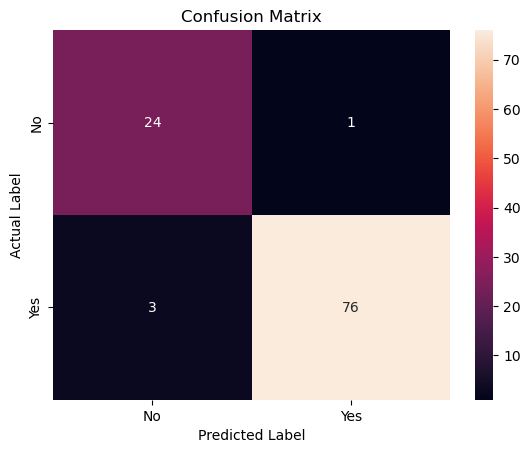

In [82]:
# plot confusion matrix to describe the performance of classifier.

cm_df=cm(y_test, y_pred)
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

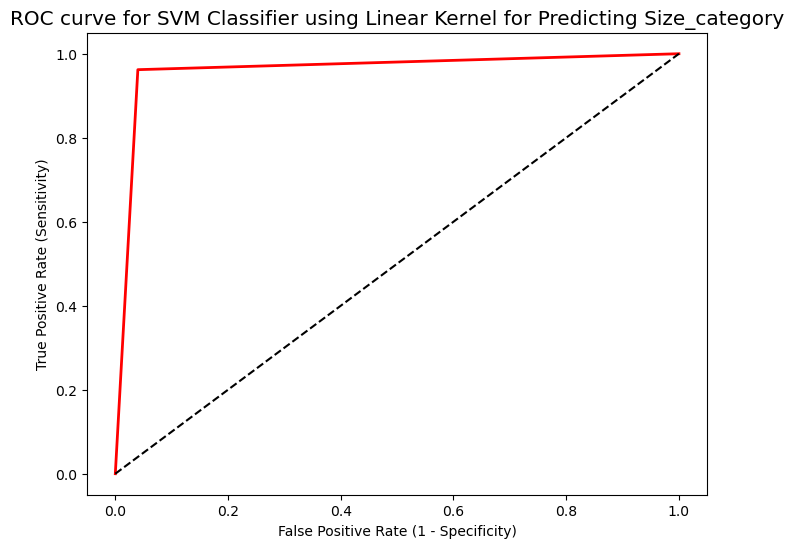

ROC AUC : 0.9610


In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))